Importing libraries and loading marketing data

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

df = pd.read_csv("marketing_data.csv")

Explore the dataset

In [6]:
print(df.head())

      id  YearBirth   Education MaritalStatus       Income  Kidhome  Teenhome  \
0   1826       1970  Graduation      Divorced  $84,835.00         0         0   
1      1       1961  Graduation        Single  $57,091.00         0         0   
2  10476       1958  Graduation       Married  $67,267.00         0         1   
3   1386       1967  Graduation      Together  $32,474.00         1         1   
4   5371       1989  Graduation        Single  $21,474.00         1         0   

  DtCustomer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0    6/16/14        0       189  ...                  6                  1   
1    6/15/14        0       464  ...                  7                  5   
2    5/13/14        0       134  ...                  5                  2   
3    5/11/14        0        10  ...                  2                  7   
4     4/8/14        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5 

In [7]:
print(df.columns)

Index(['id', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DtCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [8]:
print(df.info)

<bound method DataFrame.info of          id  YearBirth   Education MaritalStatus       Income  Kidhome  \
0      1826       1970  Graduation      Divorced  $84,835.00         0   
1         1       1961  Graduation        Single  $57,091.00         0   
2     10476       1958  Graduation       Married  $67,267.00         0   
3      1386       1967  Graduation      Together  $32,474.00         1   
4      5371       1989  Graduation        Single  $21,474.00         1   
...     ...        ...         ...           ...          ...      ...   
2235  10142       1976         PhD      Divorced  $66,476.00         0   
2236   5263       1977    2n Cycle       Married  $31,056.00         1   
2237     22       1976  Graduation      Divorced  $46,310.00         1   
2238    528       1978  Graduation       Married  $65,819.00         0   
2239   4070       1969         PhD       Married  $94,871.00         0   

      Teenhome DtCustomer  Recency  MntWines  ...  NumStorePurchases  \
0      

In [9]:
print(df.isnull().sum())

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [10]:
print(df.describe())

                 id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

Cleaning the dataset and removing outliers from income column

In [12]:
df['Income'] = df['Income'].replace(r'[\$,]', '', regex=True).astype(float)

df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in df.columns]

df['income'] = df['income'].fillna(df['income'].mean())

df = df[df['income']<300000]

print(df.head())

      id  year_birth   education marital_status   income  kidhome  teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  dt_customer  recency  mnt_wines  ...  num_store_purchases  \
0     6/16/14        0        189  ...                    6   
1     6/15/14        0        464  ...                    7   
2     5/13/14        0        134  ...                    5   
3     5/11/14        0         10  ...                    2   
4      4/8/14        0          6  ...                    2   

   num_web_visits_month  accepted_cmp3  accepted_cmp4  accepted_cmp5  \
0                     1              0              0              0   
1 

Plotting the distribution of Income

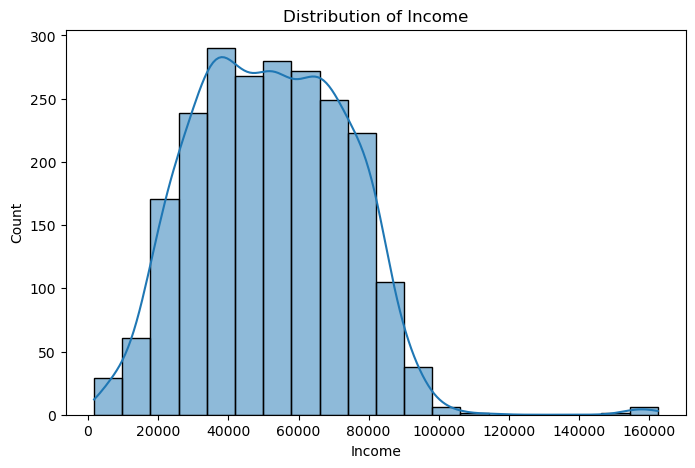

count      2239.000000
mean      51972.834762
std       21410.605416
min        1730.000000
25%       35533.500000
50%       51717.000000
75%       68277.500000
max      162397.000000
Name: income, dtype: float64


In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['income'], bins=20, kde=True)
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

print(df['income'].describe())

Creating an age column, removing outliers, and plotting its distribution

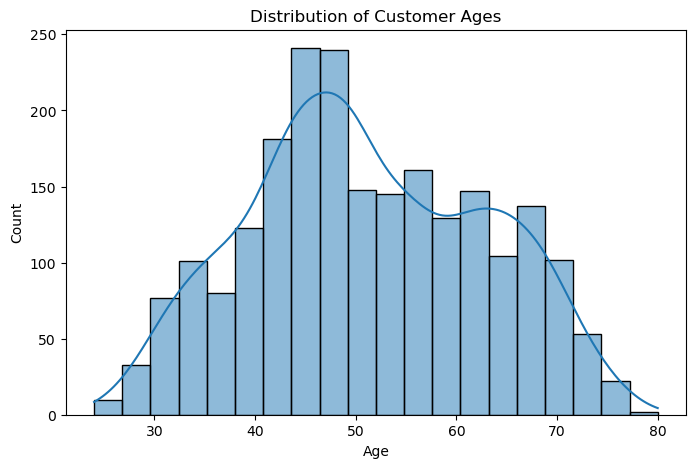

count    2236.000000
mean       51.101968
std        11.703281
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: age, dtype: float64


In [16]:
df['age'] = 2020 - df['year_birth']

df = df[df['age'] < 100]

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Distribution of Customer Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

print(df['age'].describe())

Analyzing the income by education level

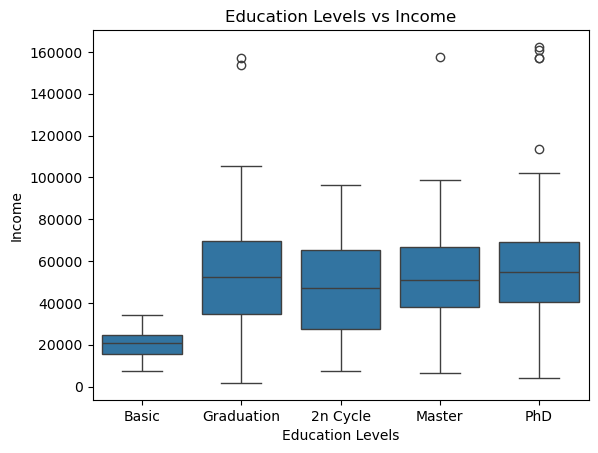

In [18]:
plt.figure()
sns.boxplot(x = df["education"], y=df["income"], 
            order=["Basic", "Graduation", "2n Cycle", "Master", "PhD"])
plt.title("Education Levels vs Income")
plt.xlabel("Education Levels")
plt.ylabel("Income")
plt.show()

Analyzing the purchase behaviour by income utilising a for loop

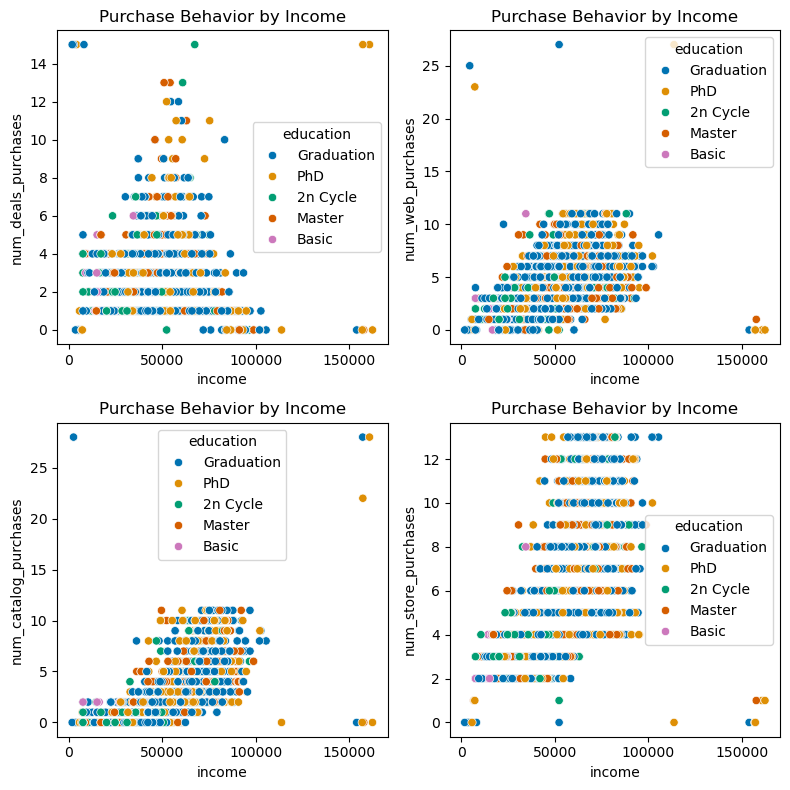

In [20]:
num_purchases_cols = ["num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]

plot = 0
fig = plt.figure(figsize=(8,8))
for i in range(len(num_purchases_cols)):
    plot += 1
    ax = plt.subplot(2, 2, plot)
    sns.scatterplot(x=df["income"], y= df[num_purchases_cols[i]], 
                    hue=df["education"], palette="colorblind")
    plt.title("Purchase Behavior by Income")

plt.tight_layout()
plt.show()

Use linear regression to look closer at the relationships between purchase behaviour and income

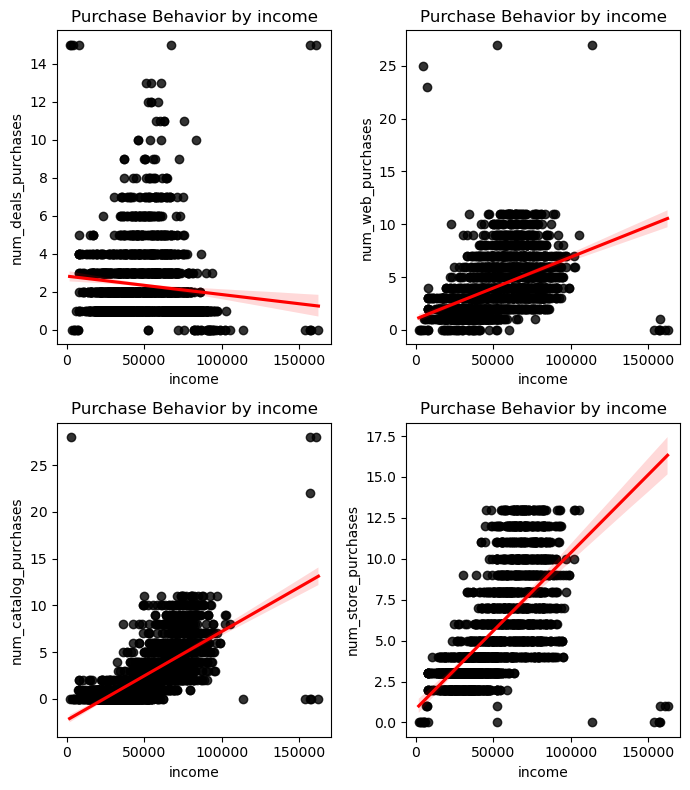

In [22]:
fig = plt.figure(figsize=(7,8))
plot = 0
# loop through number of columns to plot
for i in range(len(num_purchases_cols)):
    plot += 1
    # set up subplots
    ax = plt.subplot(2, 2, plot)
    # regression plot of purchases vs. income
    sns.regplot(x=df["income"], y= df[num_purchases_cols[i]], 
                scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.title("Purchase Behavior by income")
plt.tight_layout()
plt.show()

Combining the marketing data into one column, 'total_purchases'

In [24]:
df["total_purchases"] = df["num_deals_purchases"] + df["num_catalog_purchases"] + df["num_web_purchases"] + df["num_store_purchases"]

Scatterplot of total_purchases vs income

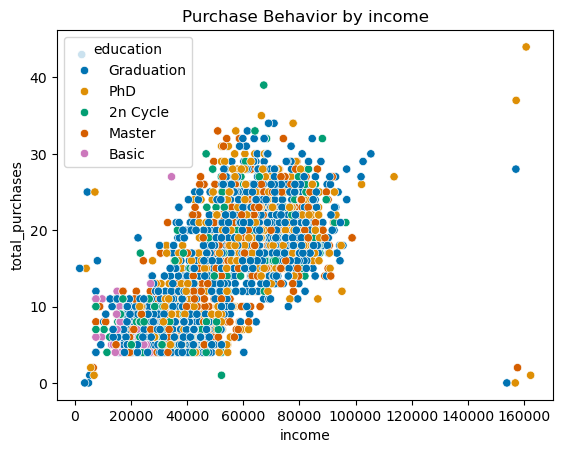

In [26]:
plt.figure()
sns.scatterplot(y=df["total_purchases"], x=df["income"], 
                hue=df['education'], palette="colorblind")
plt.title("Purchase Behavior by income")
plt.show()

Linear Regression plot of total_purchases vs income

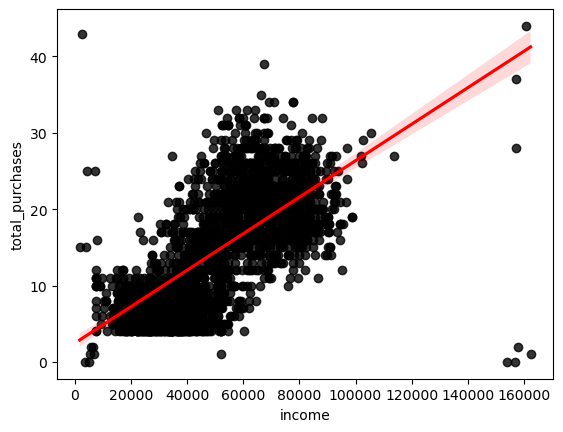

In [28]:
plt.figure()
sns.regplot(y=df["total_purchases"], x=df["income"], 
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

The above plot shows a strong linear relationship between income and total_purchases. I will now look into the relationship between education and purchases of different kinds.

Plots of purchasing behaviour vs education (seperated)

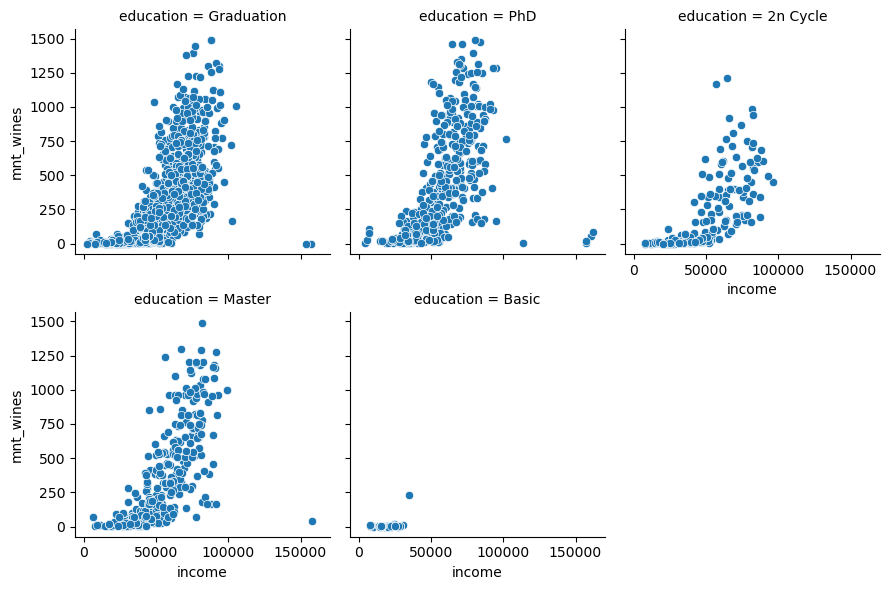

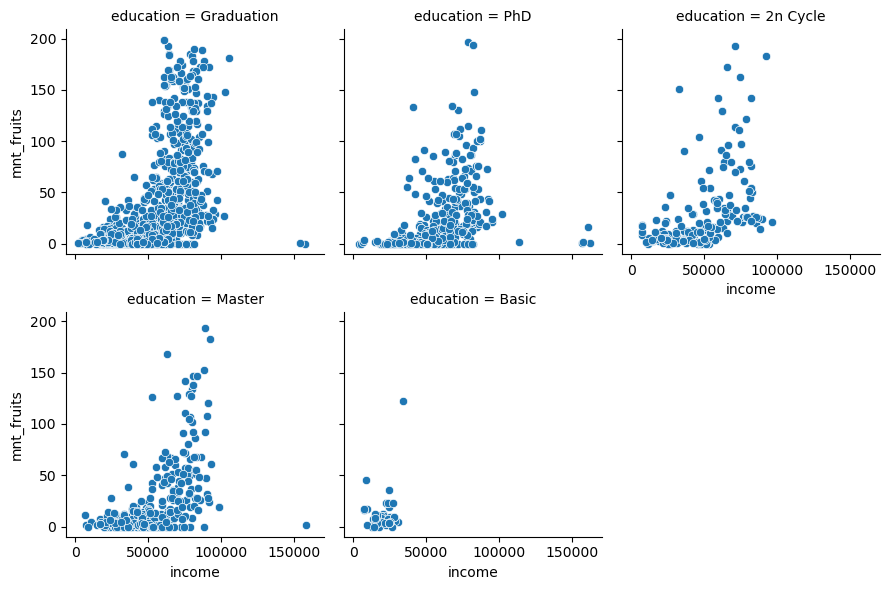

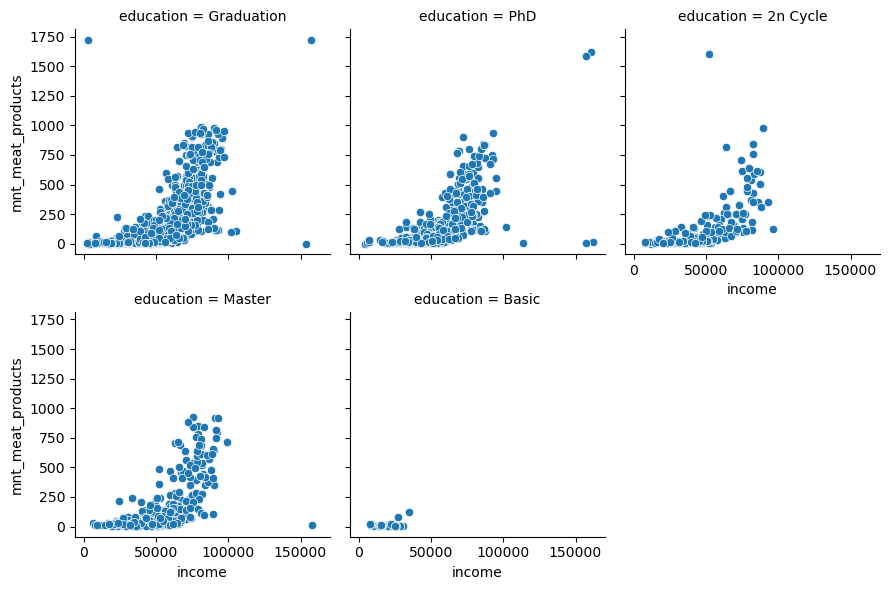

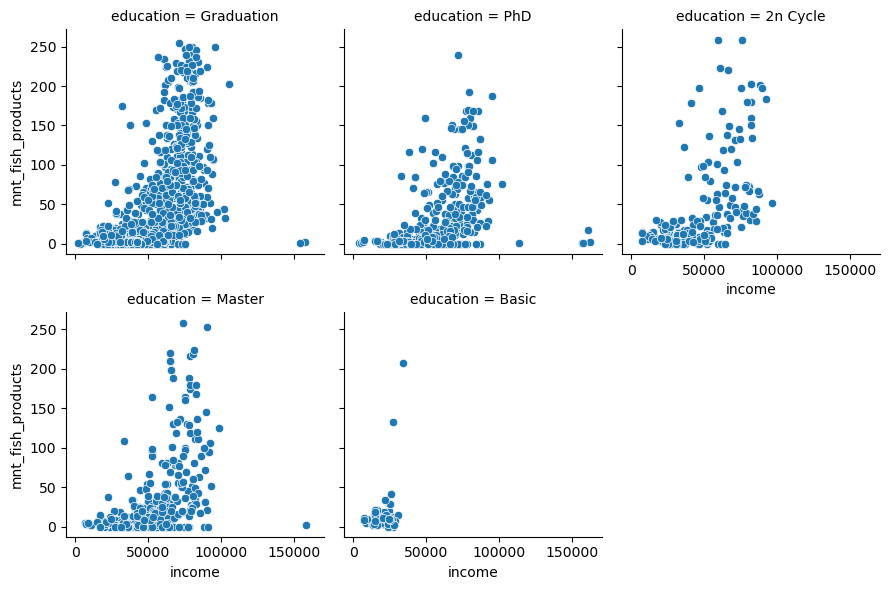

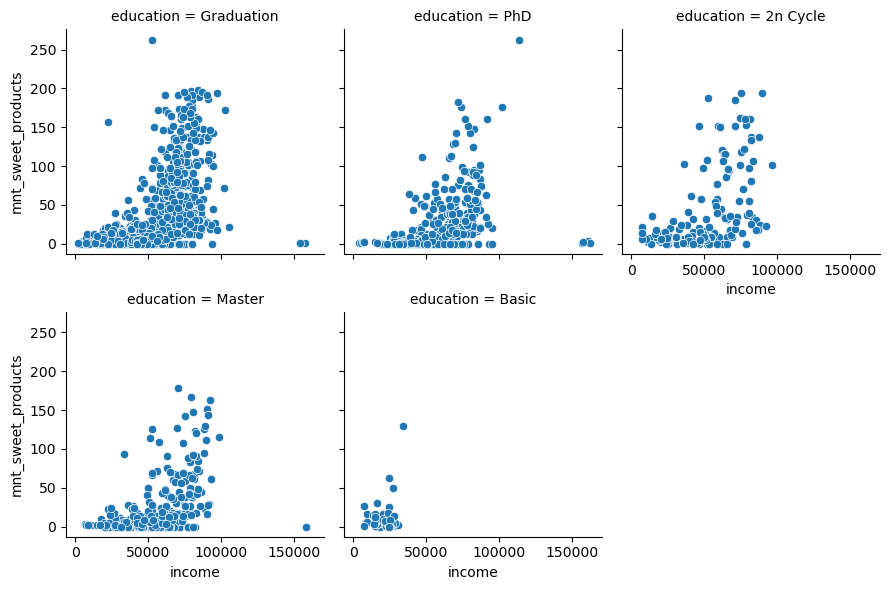

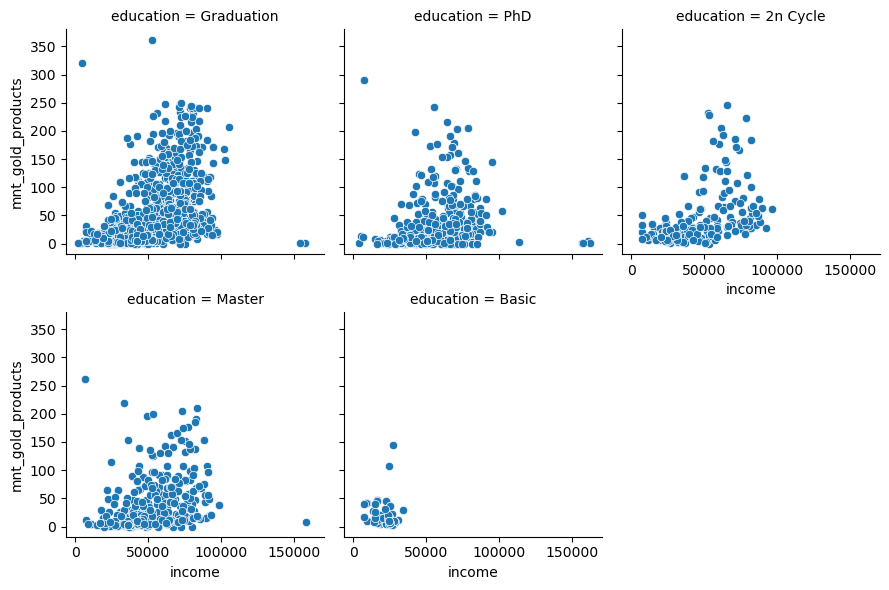

In [31]:
var_names = {}

mnt_list = ["mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]

for i in range(6):
    # defining the facet grid
    var_names["g{0}".format(i)] = sns.FacetGrid(df, col="education", col_wrap=3)
    # mapping the facet grid with scatterplots of amounts product vs. income
    var_names["g{0}".format(i)].map(sns.scatterplot, "income", mnt_list[i])
plt.show()

### Conclusion <a class="anchor" id="conclusion"></a>

##### Findings Overview

It has been observed that income has the strongest relationship with customers' purchase behavior. However, valuable insights related to education, age, and age group have also been identified. These insights can greatly inform how the store markets deals and prices items.

##### Next Steps

- Investigate how age groups purchase differently
- Investiate results from previous marketing campaigns
- Investigate customer complaint data